In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.4/620.4 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:10m
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Assignment 3¶

Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months. Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Perform following steps:

    Read the dataset.
    Distinguish the feature and target set and divide the data set into training and test sets.
    Normalize the train and test data.
    Initialize and build the model. Identify the points of improvement and implement the same.
    Print the accuracy score and confusion matrix



In [55]:
df = pd.read_csv("3-Churn_Modelling.csv") 

In [56]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)

In [58]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
lable_encoder = LabelEncoder()

df['Surname'] = lable_encoder.fit_transform(df['Surname'])
df['Geography'] =lable_encoder.fit_transform(df['Geography'])
df['Gender'] =lable_encoder.fit_transform(df['Gender'])

In [60]:
df.dtypes

Surname              int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [61]:
# Separate the features and the target variables
X = df.drop('Exited', axis = 1) # Features
Y = df['Exited'] # Target

# Split the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [62]:
# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
# we use only transform on xtest as it uses the same mean and SD learned from the training set

In [63]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

print("Sample of normalized training data:")
display(X_train_df.head())

print("\nMean of features after scaling:\n", X_train_df.mean())
print("\nStandard deviation of features after scaling:\n", X_train_df.std())

Sample of normalized training data:


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.361279,0.336963,-0.900813,0.916475,-0.086218,0.680987,0.534294,0.807162,0.646675,-1.024808,0.041673
1,1.165571,0.616810,-0.900813,-1.091137,-0.277681,-0.354341,0.642170,-0.913407,0.646675,-1.024808,-0.724481
2,0.129260,0.482069,-0.900813,-1.091137,-0.564876,-1.389668,0.182146,-0.913407,0.646675,-1.024808,1.256317
3,-0.739638,0.834469,0.304691,0.916475,-0.373413,-1.044559,0.830709,0.807162,0.646675,-1.024808,0.674876
4,-0.310494,-0.761696,1.510195,-1.091137,-0.564876,0.335877,-1.216107,0.807162,0.646675,-1.024808,-0.735362



Mean of features after scaling:
 Surname           -5.329071e-18
CreditScore        4.796163e-17
Geography          8.171241e-17
Gender             1.141309e-16
Age                1.958433e-16
Tenure             5.995204e-17
Balance           -1.740830e-16
NumOfProducts      2.220446e-18
HasCrCard         -7.105427e-18
IsActiveMember     1.096900e-16
EstimatedSalary   -6.039613e-17
dtype: float64

Standard deviation of features after scaling:
 Surname            1.000063
CreditScore        1.000063
Geography          1.000063
Gender             1.000063
Age                1.000063
Tenure             1.000063
Balance            1.000063
NumOfProducts      1.000063
HasCrCard          1.000063
IsActiveMember     1.000063
EstimatedSalary    1.000063
dtype: float64


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [65]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, lora_alpha=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using

In [80]:
model = Sequential()

model.add(Dense(units=20, activation='relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(units=80, activation = 'relu'))
model.add(Dense(units=300, activation = 'relu'))
model.add(Dense(units=300, activation = 'relu'))

model.add(Dense(units=500, activation = 'relu'))
model.add(Dense(units=300, activation = 'relu'))
model.add(Dense(units=300, activation = 'relu'))
model.add(Dense(units=100, activation = 'relu'))
model.add(Dense(units=20, activation = 'relu'))
# model.add(Dropout(0.1))
model.add(Dense(units=5, activation = 'relu'))
model.add(Dense(units=1, activation = 'sigmoid'))



In [81]:
help(model.compile)

Help on method compile in module keras.src.trainers.trainer:

compile(optimizer='rmsprop', loss=None, loss_weights=None, metrics=None, weighted_metrics=None, run_eagerly=False, steps_per_execution=1, jit_compile='auto', auto_scale_loss=True) method of keras.src.models.sequential.Sequential instance
    Configures the model for training.
    
    Example:
    
    ```python
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            keras.metrics.BinaryAccuracy(),
            keras.metrics.FalseNegatives(),
        ],
    )
    ```
    
    Args:
        optimizer: String (name of optimizer) or optimizer instance. See
            `keras.optimizers`.
        loss: Loss function. May be a string (name of loss function), or
            a `keras.losses.Loss` instance. See `keras.losses`. A
            loss function is any callable with the signature
            `loss = fn(y_true, y_pred)`, wher

In [82]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [83]:
help(model.fit)

Help on method fit in module keras.src.backend.tensorflow.trainer:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1) method of keras.src.models.sequential.Sequential instance
    Trains the model for a fixed number of epochs (dataset iterations).
    
    Args:
        x: Input data. It can be:
            - A NumPy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
            - A backend-native tensor, or a list of tensors
            (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
            - A `keras.utils.PyDataset` returning `(inputs, targets)` or
            `(inputs, targets, sample_weight

In [84]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7958 - loss: 0.5748 - val_accuracy: 0.7985 - val_loss: 0.5201
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7958 - loss: 0.5029 - val_accuracy: 0.7985 - val_loss: 0.4805
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7958 - loss: 0.4740 - val_accuracy: 0.7985 - val_loss: 0.4440
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7958 - loss: 0.4601 - val_accuracy: 0.7985 - val_loss: 0.4314
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7958 - loss: 0.4517 - val_accuracy: 0.7985 - val_loss: 0.4256
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7958 - loss: 0.4405 - val_accuracy: 0.7985 - val_loss: 0.4202
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7958 - loss: 0.4391 - val_accuracy: 0.7985 - val_loss: 0.4212
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7958 - loss: 0.4310 - val_accuracy: 0.7985 - val_loss: 0.4134


In [85]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [79]:
print("Accuracy per Epoch:\n")
for i in range(len(train_acc)):
    print(f"Epoch {i+1}: Training Accuracy = {train_acc[i]*100:.2f}%, Validation Accuracy = {val_acc[i]*100:.2f}%")

Accuracy per Epoch:

Epoch 1: Training Accuracy = 76.56%, Validation Accuracy = 79.85%
Epoch 2: Training Accuracy = 79.58%, Validation Accuracy = 79.85%
Epoch 3: Training Accuracy = 79.58%, Validation Accuracy = 79.85%
Epoch 4: Training Accuracy = 79.58%, Validation Accuracy = 79.85%
Epoch 5: Training Accuracy = 79.58%, Validation Accuracy = 79.85%
Epoch 6: Training Accuracy = 79.58%, Validation Accuracy = 79.85%
Epoch 7: Training Accuracy = 80.18%, Validation Accuracy = 80.45%
Epoch 8: Training Accuracy = 80.90%, Validation Accuracy = 81.80%
Epoch 9: Training Accuracy = 81.40%, Validation Accuracy = 80.95%
Epoch 10: Training Accuracy = 80.86%, Validation Accuracy = 82.30%
Epoch 11: Training Accuracy = 81.40%, Validation Accuracy = 82.15%
Epoch 12: Training Accuracy = 81.34%, Validation Accuracy = 83.00%
Epoch 13: Training Accuracy = 82.30%, Validation Accuracy = 83.35%
Epoch 14: Training Accuracy = 82.21%, Validation Accuracy = 83.60%
Epoch 15: Training Accuracy = 82.91%, Validation A

In [48]:
import matplotlib.pyplot as plt

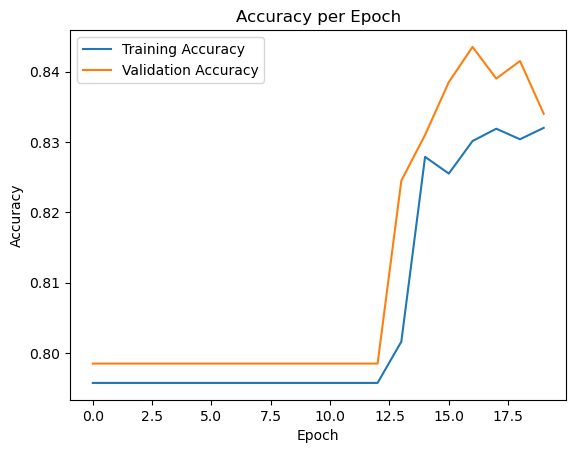

In [86]:
# Accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()